## Finite Difference Method for Solving Schr&ouml;dinger Equation
### Hydrogen radial equation

The <i>radial</i> equation for hydrogen (in SI units) is 

$$ 
-\frac{\hbar^2}{2mr}\frac{d^2}{d r^2}\, (r\psi) 
     + \frac{\hbar^2}{2m}\, \frac{l(l+1)}{r^2}\psi 
       - \frac{e^2}{4\pi\epsilon_0}\frac{1}{r} \psi = E\psi.
$$

It's standard to rewrite this in terms of a so-called <i>radial wavefunction</i> $u$,
where 

$$
\psi \equiv \frac{u(r)}{r}.
$$

The radial equation can then be written in the form

$$
-\frac{d^2u}{dr^2} +  \frac{l(l+1)}{r^2}u - \frac{2me^2}{4\pi\epsilon_0 \hbar^2 r}u
      = \frac{2mE}{\hbar^2}u.
$$

Experienced physicists might be immediately inclined to rewrite this equation 
in terms of the dimensionless length paramater $r^\prime \equiv r/a_0$, where
$a_0$ is the Bohr radius, but such previous acquaintance woth the hydrogen atom
isn't essential.   Each term in this form of the radial equation has dimensions of (length)$^{-2}$. Examination of the third term on the left side of the equation 
suggests that it might useful to use a dimensionless length parameter made up of fundamental constants characterizing the appropriate scale for this system,

$$
r^\prime = \frac{r}{a},
$$

where 

$$
a \equiv \frac{4\pi\epsilon_0\hbar^2}{me^2}.
$$

This is, in fact the Bohr radius.

Written terms of $r^\prime$ the radial equation becomes

$$
-\frac{d^2u}{d{r^\prime}^2} + \frac{l(l+1)u}{{r^\prime}^2} - \frac{2u}{r^\prime} 
   = \frac{2\hbar^2 (4\pi\epsilon_0)^2}{me^4} E u.
$$

or, defining a dimensionless energy  

$$
E^\prime \equiv \frac{E}{\frac{me^4}{2\hbar^2 (4\pi\epsilon_0)^2}} = \frac{E}{13.6\, \mbox{eV}},
$$

the radial equation becomes

$$
-\frac{d^2u}{d{r^\prime}^2} + \frac{l(l+1)u}{{r^\prime}^2} - \frac{2u}{r^\prime} 
   = E^\prime u.
$$

This is now in a good form for computational work, with no messy physical constants.


I use a finite-difference method to turn the solving of Schr&ouml;dinger's into an eigenvalue problem.  Briefly, after discretizing $r$, (i.e., $r^\prime_j =  
j\Delta$), an approximate version of Schr&ouml;dinger's equation can be written as 

$$
\frac{-u_{j+1} + 2u_j - u_{j-1}}{\Delta^2} + \left(\frac{l(l+1)}{{r^\prime_j}^2} 
   - \frac{2}{r^\prime_j}\right) u_j =  E^\prime u_j.
$$

The term in parentheses is sometimes called an effective potential $U_{\rm eff}$.

This is an eigenvalue problem:

$$  
H_{ji}\psi_i = E^\prime \psi_j,
$$

where 


$$
H_{ji} = \left\{\begin{array}{cl}
                \frac{2}{\Delta^2} + U_{\rm eff}(r^\prime_i) & \mbox{for $i=j$} \\
                -\frac{1}{\Delta^2} & \mbox{for  $i = j\pm 1$}\\
                0 & \mbox{otherwise}
                \end{array}\right.
$$

The eigenvalues give the energy of the states, and the eigenvectors are numerical
approximations of the wavefunctions.

[The method can be extended to more than one dimension and to situations with more than 
one particle. I have used this technique for a variety of one-dimensional potentials, 
and I have extended it to treat the two-dimensional harmonic oscillator, 
 excited states of helium. For a recent pedagogical discussion of the method, 
see <i>Matrix Numerov method for solving Schr&ouml;dinger's equation</i>,
Mohandas Pillai, Joshua Goglio, and Thad G. Walker, Am. J. Phys. <b>80</b>, 1017 (2012)]

In [1]:
import numpy as np
from scipy import linalg

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def u(x):       # Effective potential energy function
    return l*(l+1)/x**2 - 2/x

In [4]:
n = 2000    # Number of intervals (J=1 in my notes)
dim = n - 1 # Number of internal points
xl = 0      # xl corresponds to origin
xr = 200.   # 
delta = (xr-xl)/n
        
x = np.linspace(xl+delta,xr-delta,dim)

l = 1       # orbital quantum number

#Fill Hamiltonian
h = np.zeros((dim,dim),float)
for i in range(len(h)-1):
        h[i,i+1] = h[i+1,i] = -1/delta**2 

for i in range(len(h)):
        h[i,i] = 2./delta**2 + u(x[i]) 

vals, vecs = linalg.eigh(h)      #Note: eigenvectors in columns of vecs

<IPython.core.display.Javascript object>


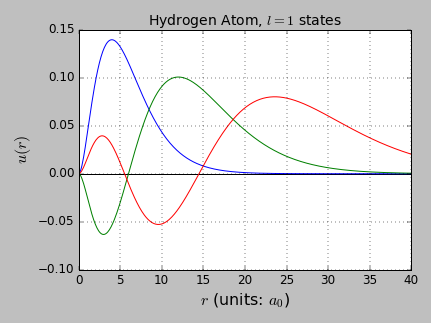

m =  0 , energy = -0.25005216296857374 , 1/energy = -3.999165566608911
m =  1 , energy = -0.11113514902286992 , 1/energy = -8.998053350288084
m =  2 , energy = -0.06251238530016257 , 1/energy = -15.996829991342523


In [5]:
plt.figure()
plt.title("Hydrogen Atom, $l = 1$ states")
plt.xlabel("$r$ (units: $a_0$)")
plt.ylabel("$u(r)$")
plt.axhline(0, color='black')     #draw x axis
plt.grid(True)
plt.xlim(0,40)

for m in range(3):
    y = np.transpose(vecs)[m]
    plt.plot(x,y)
    print('m = ',m, ', energy =', vals[m], ', 1/energy =', 1/vals[m])

#### Comments

The energies returned are $-13.6/4\, \mbox{eV}$, $-13.6/9\, \mbox{eV}$,
and $-13.6/16\, \mbox{eV}$.

This notebook was evaluated for orbital angular quantum number $l = 1$.
The lowest energy state returned by the calculation above is called `vals[0]`;
the value of `m=0` should not be confused with the value of $n$ in the 
formula $H \propto 1/n^2$ for the energies of the hydrogen atom.  When $l = 1$, 
the lowest possible energy is for the $2p$ state, where $n=2$.

#### Radial probability density

Compare with graphs on pp. 210-211 in <i>Quantum Physics</i> by S. Gasiorowicz (2nd ed.)

<IPython.core.display.Javascript object>


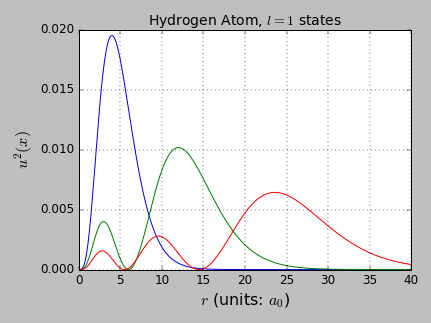

In [6]:
plt.figure()
plt.title("Hydrogen Atom, $l = 1$ states")
plt.xlabel("$r$ (units: $a_0$)")
plt.ylabel("$u^2(x)$")
plt.axhline(0, color='black')     #draw x axis
plt.grid(True)
plt.xlim(0,40)

for m in range(3):
    #y = np.append([xl],np.append(np.transpose(vecs)[m],[xr]))
    y = np.transpose(vecs)[m]
    plt.plot(x, y**2)

#### Version information

+ `%version_information` is an IPython magic extension for showing version 
information for dependency modules in a notebook;

+ See https://github.com/jrjohansson/version_information

+ `%version_information` is available on Bucknell computers on the linux network. 
You can easily install it on any computer.

In [7]:
%load_ext version_information

In [8]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
matplotlib 3.2.2
Fri Jan 01 10:29:55 2021 EST